# Set up

In [2]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = '/Users/zhouyi/Desktop/学习/Hands on Machine Learning'
CHAPTER_ID = '02_End_to_End_Project'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)

def save_fig(fig_id, tight_layput=True, fig_extension='png',resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print('Saving figure',fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import warnings
warnings.filterwarnings(action='ignore', message='internal gelsd')

# Download the data

In [3]:
import os
import tarfile
from six.moves import urllib

download_root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
housing_path = os.path.join('datasets','housing')
housing_url = download_root + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url = housing_url, housing_path = housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path = housing_path):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


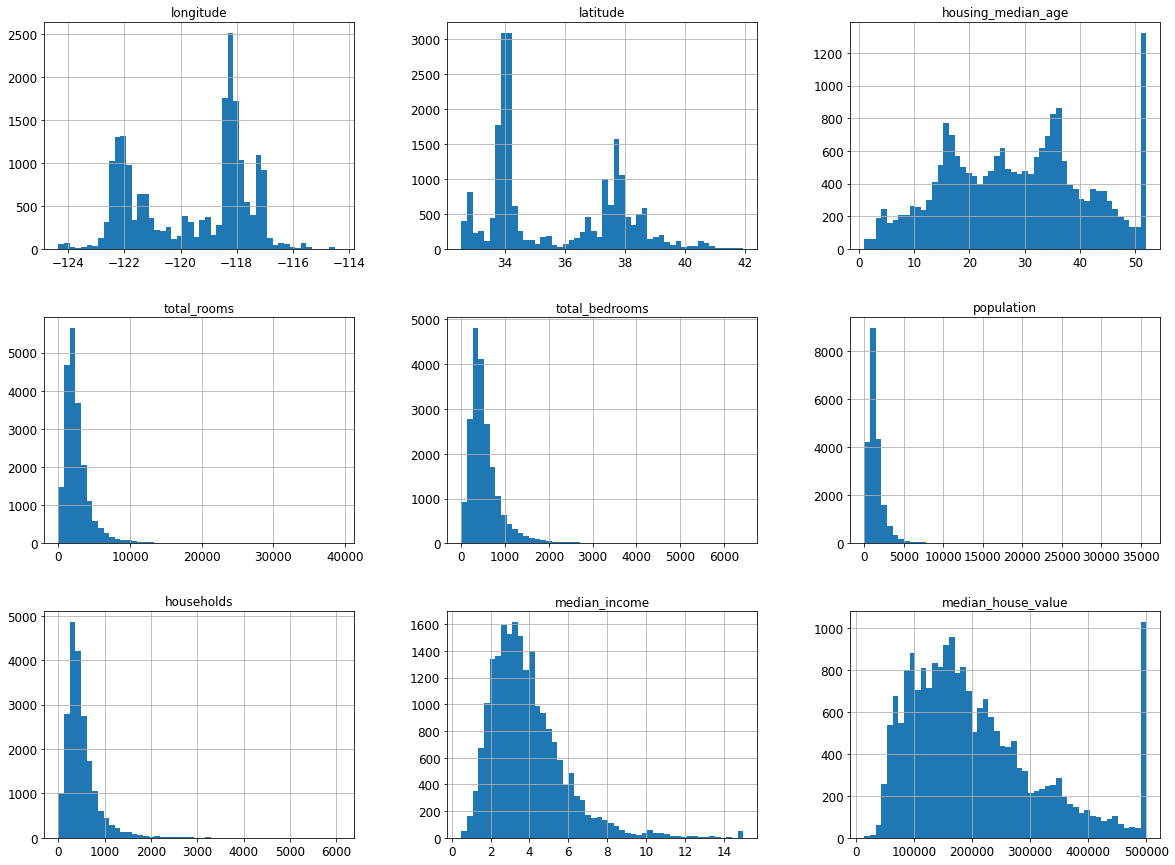

In [10]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
# Create test set

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)

<AxesSubplot:>

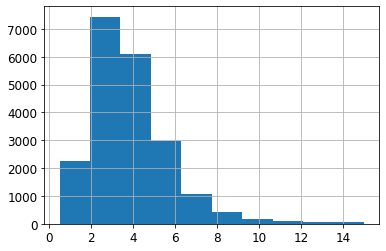

In [12]:
housing['median_income'].hist()

<AxesSubplot:>

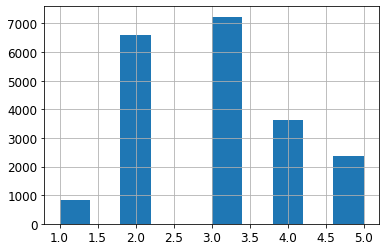

In [13]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0.,1.5,3.0,4.5,6.,np.inf],
                               labels = [1,2,3,4,5])
housing['income_cat'].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [17]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [19]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall':income_cat_proportions(housing),
    'Stratified':income_cat_proportions(strat_test_set),
    'Random':income_cat_proportions(test_set)
}).sort_index()
compare_props['Rand. $error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [20]:
compare_props

,Overall,Stratified,Random,Rand. $error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat',axis = 1, inplace = True)

# Discover and Visualize the Data to Gain Insights

In [22]:
housing = strat_train_set.copy()

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

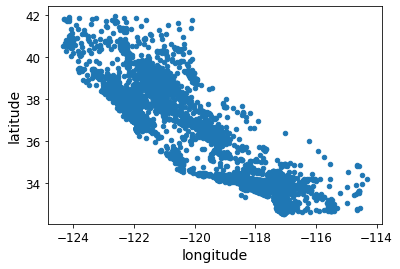

In [24]:
housing.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

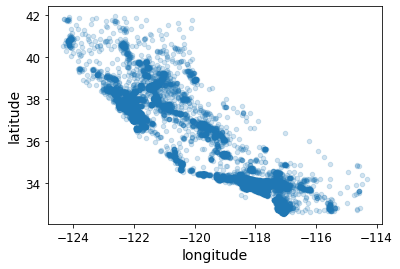

In [26]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2)
# 参数alpha决定图表的填充不透明度，范围[0,1]，默认值是1

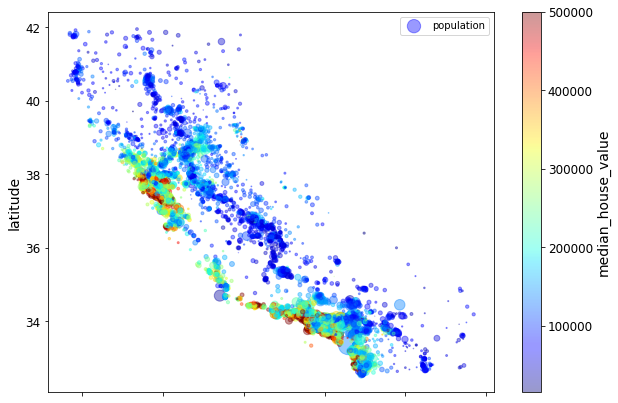

In [27]:
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha=0.4,
            s = housing['population']/100, label='population',figsize=(10,7),
            c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [28]:
corr_matrix = housing.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

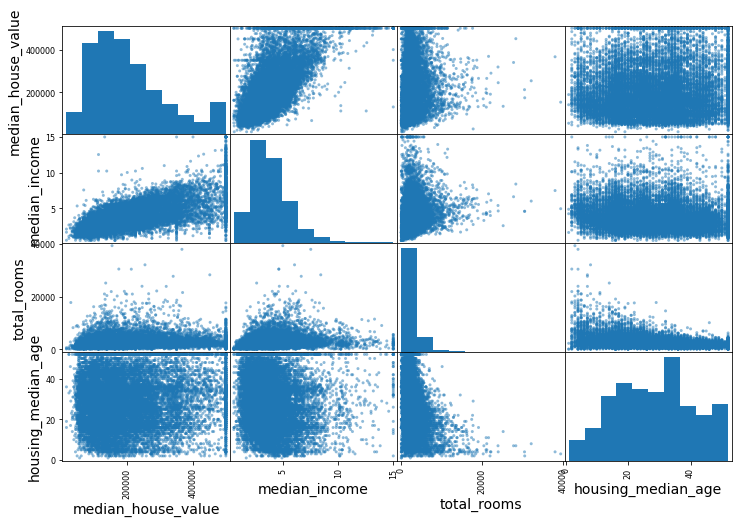

In [31]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

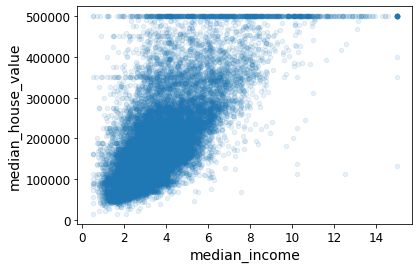

In [32]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [33]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [34]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [35]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [36]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [39]:
"""
Data cleaning

1. Get rid of the corresponding districts                        # dropna()
2. Get rid of the whole attribute                                # drop()
3. Set the values to some value(zero, the mean, the median, etc) # fillna()

housing.dropna(subset=['total_bedrooms'])                # option 1
housing.drop('total_bedrooms',axis=1)                    # option 2
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)   # option 3

"""

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [40]:
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [41]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [42]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [43]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [44]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [45]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [46]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [47]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [48]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

## Transformation Pipelines

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [52]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [54]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [56]:
housing_prepared.shape

(16512, 16)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [58]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print("Labels:",list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [59]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [60]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross_Validation

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [62]:
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())

In [63]:
display_scores(tree_rmse_scores)

Scores: [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean: 71432.52332065887
Standard deviation: 2696.6824522410743


In [64]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818065


In [66]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error',cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores: [51310.36596698 48783.61115738 46940.16175904 51639.04443167
 47568.28777569 51438.04602341 52453.15384043 49901.47421102
 48499.67417521 53442.71104377]
Mean: 50197.65303845906
Standard deviation: 2072.85259900823


In [68]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)

svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
display_scores(svm_rmse)

Scores: 111095.06635291968
Mean: 111095.06635291968
Standard deviation: 0.0


# Fine-Tune Your Model

## Grid Search

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [71]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [72]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score),params)

63328.62166174077 {'max_features': 2, 'n_estimators': 3}
55674.65745326779 {'max_features': 2, 'n_estimators': 10}
52765.245800718585 {'max_features': 2, 'n_estimators': 30}
60120.50738829682 {'max_features': 4, 'n_estimators': 3}
52942.48606991967 {'max_features': 4, 'n_estimators': 10}
50415.66102088364 {'max_features': 4, 'n_estimators': 30}
58406.04942575516 {'max_features': 6, 'n_estimators': 3}
52504.41274602083 {'max_features': 6, 'n_estimators': 10}
50004.87111197479 {'max_features': 6, 'n_estimators': 30}
58976.78080244157 {'max_features': 8, 'n_estimators': 3}
52282.324282246496 {'max_features': 8, 'n_estimators': 10}
50027.7913712171 {'max_features': 8, 'n_estimators': 30}
62417.83870687301 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54160.6494352447 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60292.13788489875 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52171.160219799625 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [73]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055383,0.002976,0.003400,0.000285,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.239573e+09,-3.754305e+09,...,-4.010514e+09,1.887898e+08,18,-1.163847e+09,-1.087866e+09,-1.136214e+09,-1.009665e+09,-1.069990e+09,-1.093516e+09,5.363953e+07
1,0.164695,0.006046,0.009378,0.001248,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.080750e+09,-3.102147e+09,...,-3.099667e+09,2.615510e+07,11,-5.779918e+08,-5.926312e+08,-5.798033e+08,-5.537802e+08,-5.828985e+08,-5.774210e+08,1.285490e+07
2,0.489351,0.007886,0.022740,0.001036,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.802340e+09,-2.670208e+09,...,-2.784171e+09,7.809364e+07,8,-4.349208e+08,-4.325429e+08,-4.389892e+08,-4.287055e+08,-4.192056e+08,-4.308728e+08,6.721201e+06
3,0.079531,0.002473,0.003259,0.000630,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.533487e+09,-3.722640e+09,...,-3.614475e+09,1.036559e+08,15,-9.507148e+08,-1.045445e+09,-9.204716e+08,-9.436211e+08,-9.855352e+08,-9.691575e+08,4.347537e+07
4,0.266901,0.003288,0.007756,0.000189,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.845257e+09,-2.636060e+09,...,-2.802907e+09,1.029039e+08,9,-5.181162e+08,-5.179116e+08,-5.387621e+08,-5.014139e+08,-5.452609e+08,-5.242929e+08,1.581984e+07
5,0.800188,0.010918,0.023522,0.000823,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.563654e+09,-2.497397e+09,...,-2.541739e+09,7.055058e+07,3,-3.907191e+08,-3.877020e+08,-4.027091e+08,-3.927620e+08,-3.871627e+08,-3.922110e+08,5.631259e+06
6,0.113569,0.002792,0.002931,0.000157,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.375717e+09,-3.233777e+09,...,-3.411267e+09,1.476843e+08,12,-9.466950e+08,-9.127602e+08,-8.640494e+08,-8.740959e+08,-9.210336e+08,-9.037268e+08,3.059308e+07
7,0.376684,0.009546,0.008787,0.000750,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.754546e+09,-2.614604e+09,...,-2.756713e+09,8.286662e+07,7,-5.164684e+08,-5.127736e+08,-5.100120e+08,-5.044419e+08,-5.069461e+08,-5.101284e+08,4.234844e+06
8,1.108024,0.010239,0.022321,0.000849,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.502421e+09,-2.418518e+09,...,-2.500487e+09,5.735435e+07,1,-3.845889e+08,-3.738098e+08,-3.947118e+08,-3.688283e+08,-3.749266e+08,-3.793731e+08,9.212993e+06
9,0.149010,0.005270,0.003202,0.000343,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.532216e+09,-3.349937e+09,...,-3.478261e+09,1.643579e+08,13,-9.103279e+08,-8.902944e+08,-9.364131e+08,-8.989200e+08,-8.975027e+08,-9.066916e+08,1.618822e+07


## Randomized Search

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error',random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe7737ab460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe760a1f8e0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [75]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


## Analyse the Best Model and Their Errors

In [76]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33984038e-02, 6.65695235e-02, 4.41506109e-02, 1.78987019e-02,
       1.69129309e-02, 1.67478905e-02, 1.65891122e-02, 3.36621462e-01,
       5.85558868e-02, 1.16053093e-01, 8.81681702e-02, 1.40239005e-02,
       1.25584520e-01, 9.71706862e-05, 4.34027551e-03, 4.28834743e-03])

In [77]:
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3366214616302614, 'median_income'),
 (0.12558452007103849, 'INLAND'),
 (0.11605309342720171, 'pop_per_hhold'),
 (0.08816817019010698, 'bedrooms_per_room'),
 (0.07339840378953126, 'longitude'),
 (0.06656952351072588, 'latitude'),
 (0.058555886819124936, 'rooms_per_hhold'),
 (0.044150610946197495, 'housing_median_age'),
 (0.01789870186906829, 'total_rooms'),
 (0.016912930930866068, 'total_bedrooms'),
 (0.016747890544519674, 'population'),
 (0.01658911215505547, 'households'),
 (0.014023900490138132, '<1H OCEAN'),
 (0.004340275514040259, 'NEAR BAY'),
 (0.004288347425885219, 'NEAR OCEAN'),
 (9.7170686238687e-05, 'ISLAND')]

## Evaluate Your System on the Test Set

In [79]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [80]:
final_rmse

47764.997207243665

In [81]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([45805.63295778, 49647.09362846])